## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [7]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [9]:
df['average'] = (df['math_score'] + df['reading_score'] +df['writing_score'] )/3

In [10]:
X = df.drop(columns=['average'],axis=1)

In [11]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [81]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


### Target to predict average score of all students

In [54]:
y = df['average'] #### predict average score

In [55]:
y

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: average, Length: 1000, dtype: float64

In [56]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude=['object','category']).columns
cat_features = X.select_dtypes(include = ['object', 'category']).columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_standard = StandardScaler()
oh_scaler = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_scaler, cat_features),
        ('StandardScaler', num_standard, num_features)
    ]
)

In [57]:
# separate dataset into train and test in order to fit and transform the train data and transform the test data. Test data to validate model performance
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 8), (200, 8))

In [58]:
X_train.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
29,female,group D,master's degree,standard,none,62,70,75
535,female,group C,bachelor's degree,free/reduced,completed,66,83,83
695,female,group D,some college,free/reduced,none,79,89,86
557,male,group C,master's degree,free/reduced,none,61,67,66
836,male,group E,high school,standard,none,73,64,57


In [59]:
train_X = preprocessor.fit_transform(X_train) ### fit and transform the train data

In [66]:
train_X

array([[ 1.        ,  0.        ,  0.        , ..., -0.29945237,
         0.03079054,  0.43405338],
       [ 1.        ,  0.        ,  0.        , ..., -0.03305048,
         0.9302895 ,  0.96470125],
       [ 1.        ,  0.        ,  0.        , ...,  0.83275564,
         1.34544287,  1.1636942 ],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.89885661,
        -0.52274728, -1.02522827],
       [ 0.        ,  1.        ,  0.        , ..., -1.09865802,
        -1.49143847, -1.02522827],
       [ 1.        ,  0.        ,  0.        , ...,  1.23235847,
         1.48382733,  1.36268716]])

In [60]:
test_X = preprocessor.transform(X_test)  ### test data only need to transform

In [67]:
test_X

array([[ 1.        ,  0.        ,  0.        , ...,  1.6319613 ,
         1.13786619,  1.03103224],
       [ 1.        ,  0.        ,  0.        , ..., -0.89885661,
        -0.24597837,  0.30139141],
       [ 0.        ,  1.        ,  0.        , ...,  0.89935611,
         0.23836723,  0.23506043],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.49975329,
         0.79190505,  0.50038436],
       [ 1.        ,  0.        ,  0.        , ..., -0.09965095,
         0.51513614,  0.36772239],
       [ 1.        ,  0.        ,  0.        , ..., -0.36605284,
         0.30755945,  0.23506043]])

#### Create an Evaluate Function to give all metrics after model Training

In [61]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    r2_square = r2_score(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    
    return mae, mse ,r2_square

In [62]:
### no crossvalidation
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(train_X, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(train_X)
    y_test_pred = model.predict(test_X)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.1134
- Mean Absolute Error: 0.8431
- R2 Score: 0.9944
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.2188
- Mean Absolute Error: 0.8679
- R2 Score: 0.9943


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0001
- Mean Absolute Error: 0.0064
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0001
- Mean Absolute Error: 0.0066
- R2 Score: 1.0000


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.0312
- Mean Absolute Error: 1.7606
- R2 Score: 0.9748
-----------------------

### Results of no validation

In [47]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Model', 'r2_score']).sort_values(by =['r2_score'], ascending = False).reset_index().drop('index', axis=1)

,Model,r2_score
0,Linear Regression,1.000000
1,Ridge,1.000000
2,XGBRegressor,0.994748
3,Lasso,0.994314
4,Random Forest Regressor,0.993931
5,CatBoosting Regressor,0.993443
6,Decision Tree,0.988190
7,AdaBoost Regressor,0.977975
8,K-Neighbors Regressor,0.956819


### Using cross validation

In [48]:
### cross validation using KFold( notice stratifiedkfold is for binary or multiclass categories)
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(5, shuffle= True, random_state=42)

In [63]:
### using cross validation to avoid overfiiting create baseline model
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
entries_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    scores = cross_val_score(model,train_X, y_train, scoring = 'r2', cv = k_fold)
        
    for fold_idx, score in enumerate(scores):
        entries_list.append((list(models.keys())[i], score))

    cv_df = pd.DataFrame(entries_list, columns=['model', 'r2_score'])
    mean= cv_df.groupby('model')['r2_score'].mean()
    std= cv_df.groupby('model')['r2_score'].std()   
    baseline_cv = pd.concat([mean, std], axis =1, ignore_index=True)
    baseline_cv.columns = ['Mean_r2', 'Std_r2']
    

#### Create baseline model and then tunning 

In [64]:
baseline_cv.sort_values(by =['Mean_r2', 'Std_r2'], ascending=False)

,Mean_r2,Std_r2
model,,
Linear Regression,1.000000,0.000000e+00
Ridge,0.999999,8.813672e-09
CatBoosting Regressor,0.998544,1.290160e-03
Random Forest Regressor,0.996491,1.194978e-03
XGBRegressor,0.995818,1.282632e-03
Lasso,0.994335,2.342533e-04
Decision Tree,0.986394,1.358116e-03
AdaBoost Regressor,0.978866,5.143630e-03
K-Neighbors Regressor,0.964139,2.403804e-03


## Linear Regression (due to best performance that it gave)

In [70]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(train_X, y_train)
y_pred = lin_model.predict(test_X)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


## Plot y_pred and y_test

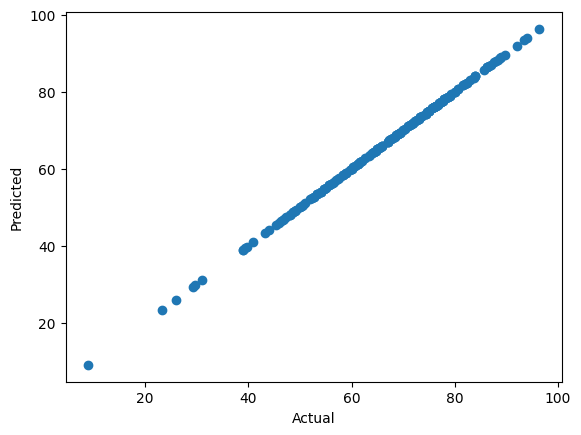

In [52]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

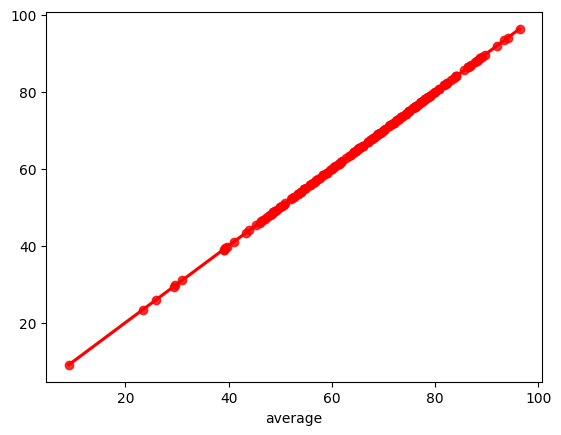

In [53]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [81]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df[pred_df['Difference'] >0]

,Actual Value,Predicted Value,Difference
737,64.000000,64.000000,7.105427e-15
740,75.000000,75.000000,1.421085e-14
660,74.666667,74.666667,1.421085e-14
411,81.666667,81.666667,1.421085e-14
678,78.000000,78.000000,1.421085e-14
...,...,...,...
829,58.333333,58.333333,1.421085e-14
213,55.666667,55.666667,7.105427e-15
408,55.000000,55.000000,1.421085e-14
332,57.000000,57.000000,1.421085e-14
